In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('global_laptop_selling_data.csv')

In [4]:
df.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [5]:
df.nunique()

laptop_ID           1303
Company               19
Product              618
TypeName               6
Inches                18
ScreenResolution      40
Cpu                  118
Ram                    9
Memory                39
Gpu                  106
OpSys                  9
Weight               179
Price_euros          791
dtype: int64

In [6]:
df = df.drop('laptop_ID', axis=1)

In [7]:
df.head() # y = df[['Price_euros']]

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


# Preprocessing

In [8]:
df["Weight"] = df["Weight"].str.replace("kg","")
df["Weight"] = pd.to_numeric(df["Weight"])
df["Ram"] = df["Ram"].apply(lambda x : str(x).replace("GB","")).astype(int)

In [9]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float64
 11  Price_euros       1303 non-null   float64
dtypes: float64(3), int32(1), object(8)
memory usage: 117.2+ KB


In [11]:
df.dropna(inplace=True) 

In [12]:
df_product_price = df.groupby("Company")["Price_euros"].mean()

In [13]:
df_product_price

Company
Acer          626.775825
Apple        1564.198571
Asus         1104.169367
Chuwi         314.296667
Dell         1186.068990
Fujitsu       729.000000
Google       1677.666667
HP           1067.774854
Huawei       1424.000000
LG           2099.000000
Lenovo       1086.384444
MSI          1728.908148
Mediacom      295.000000
Microsoft    1612.308333
Razer        3346.142857
Samsung      1413.444444
Toshiba      1267.812500
Vero          217.425000
Xiaomi       1133.462500
Name: Price_euros, dtype: float64

In [14]:
df_product_price = pd.DataFrame(data = df_product_price)
df_product_price.columns = ["Product Avg Price"]
df_product_price.sort_values(by="Product Avg Price",ascending=False,inplace=True)


Text(0.5, 1.0, 'Average Price Per Company')

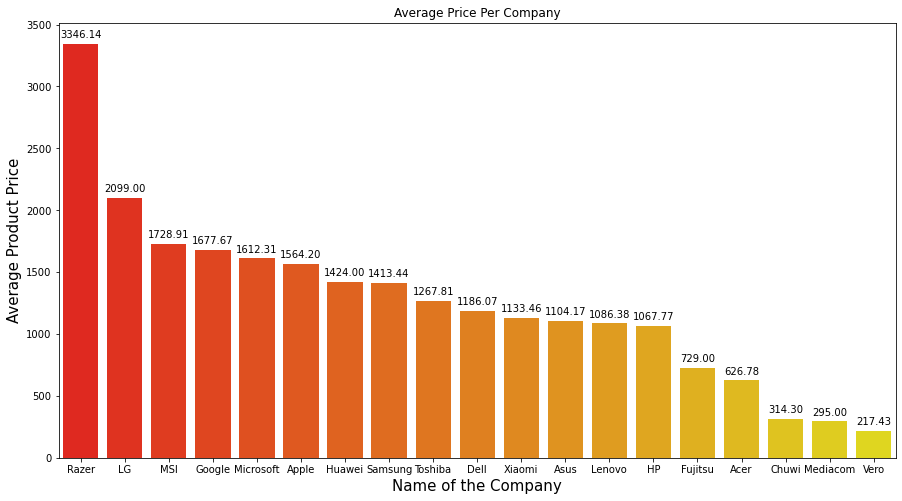

In [15]:
plt.figure(figsize = (15,8))
splot = sns.barplot(data = df_product_price,x= df_product_price.index, y = 'Product Avg Price', palette = 'autumn')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
    
plt.xlabel("Name of the Company", size=15)
plt.ylabel("Average Product Price", size=15)
plt.title('Average Price Per Company')

# Keep Continue for Regression Model

In [16]:
#linear regression 2 types--> Gradient Descent and Least Square
#KNN regression
#Logistic regression
#MUltivariable linar regression

# Handleing "ScreenResolution" column

In [17]:
df['ScreenResolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [18]:
df[['Screen','Screen_Resoluton_Height']] = df['ScreenResolution'].str.split('x',expand=True)
#screen 
#resolution -- >width x height format
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Screen,Screen_Resoluton_Height
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,IPS Panel Retina Display 2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,Full HD 1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,IPS Panel Retina Display 2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,IPS Panel Retina Display 2560,1600


In [19]:
df['Screen_Resoluton_Height']

0       1600
1        900
2       1080
3       1800
4       1600
        ... 
1298    1080
1299    1800
1300     768
1301     768
1302     768
Name: Screen_Resoluton_Height, Length: 1303, dtype: object

In [20]:
df["Screen_Resoluton_Height"] = pd.to_numeric(df["Screen_Resoluton_Height"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1303 non-null   object 
 1   Product                  1303 non-null   object 
 2   TypeName                 1303 non-null   object 
 3   Inches                   1303 non-null   float64
 4   ScreenResolution         1303 non-null   object 
 5   Cpu                      1303 non-null   object 
 6   Ram                      1303 non-null   int32  
 7   Memory                   1303 non-null   object 
 8   Gpu                      1303 non-null   object 
 9   OpSys                    1303 non-null   object 
 10  Weight                   1303 non-null   float64
 11  Price_euros              1303 non-null   float64
 12  Screen                   1303 non-null   object 
 13  Screen_Resoluton_Height  1303 non-null   int64  
dtypes: float64(3), int32(1),

In [21]:
df['Screen']

0               IPS Panel Retina Display 2560
1                                        1440
2                                Full HD 1920
3               IPS Panel Retina Display 2880
4               IPS Panel Retina Display 2560
                        ...                  
1298     IPS Panel Full HD / Touchscreen 1920
1299    IPS Panel Quad HD+ / Touchscreen 3200
1300                                     1366
1301                                     1366
1302                                     1366
Name: Screen, Length: 1303, dtype: object

In [22]:
df[["Screen_Display", "sep","Screen_Resoluton_Width"]] = df["Screen"].str.split("(\d\d)", n=1, expand=True)
df["Screen_Resoluton_Width"] = df["sep"] + df["Screen_Resoluton_Width"]
df.drop("sep", inplace=True, axis=1)

In [23]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Screen,Screen_Resoluton_Height,Screen_Display,Screen_Resoluton_Width
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,IPS Panel Retina Display 2560,1600,IPS Panel Retina Display,2560
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1440,900,,1440
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,Full HD 1920,1080,Full HD,1920
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,IPS Panel Retina Display 2880,1800,IPS Panel Retina Display,2880
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,IPS Panel Retina Display 2560,1600,IPS Panel Retina Display,2560


In [24]:
df['Screen_Resoluton_Width']

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: Screen_Resoluton_Width, Length: 1303, dtype: object

In [25]:
df["Screen_Resoluton_Width"] = pd.to_numeric(df["Screen_Resoluton_Width"])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1303 non-null   object 
 1   Product                  1303 non-null   object 
 2   TypeName                 1303 non-null   object 
 3   Inches                   1303 non-null   float64
 4   ScreenResolution         1303 non-null   object 
 5   Cpu                      1303 non-null   object 
 6   Ram                      1303 non-null   int32  
 7   Memory                   1303 non-null   object 
 8   Gpu                      1303 non-null   object 
 9   OpSys                    1303 non-null   object 
 10  Weight                   1303 non-null   float64
 11  Price_euros              1303 non-null   float64
 12  Screen                   1303 non-null   object 
 13  Screen_Resoluton_Height  1303 non-null   int64  
 14  Screen_Display          

In [27]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Screen,Screen_Resoluton_Height,Screen_Display,Screen_Resoluton_Width
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,IPS Panel Retina Display 2560,1600,IPS Panel Retina Display,2560
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,1440,900,,1440
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,Full HD 1920,1080,Full HD,1920
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,IPS Panel Retina Display 2880,1800,IPS Panel Retina Display,2880
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,IPS Panel Retina Display 2560,1600,IPS Panel Retina Display,2560


In [28]:
df.drop('Screen',axis=1,inplace=True)
df.drop('ScreenResolution',axis=1,inplace=True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1303 non-null   object 
 1   Product                  1303 non-null   object 
 2   TypeName                 1303 non-null   object 
 3   Inches                   1303 non-null   float64
 4   Cpu                      1303 non-null   object 
 5   Ram                      1303 non-null   int32  
 6   Memory                   1303 non-null   object 
 7   Gpu                      1303 non-null   object 
 8   OpSys                    1303 non-null   object 
 9   Weight                   1303 non-null   float64
 10  Price_euros              1303 non-null   float64
 11  Screen_Resoluton_Height  1303 non-null   int64  
 12  Screen_Display           1303 non-null   object 
 13  Screen_Resoluton_Width   1303 non-null   int64  
dtypes: float64(3), int32(1),

We have split ScreenResolution column into three columns

Screen_Resoluton_Height

Screen_Display

Screen_Resoluton_Width

# Handling "Cpu" Column

In [30]:
df['Cpu'].head(100)

0            Intel Core i5 2.3GHz
1            Intel Core i5 1.8GHz
2      Intel Core i5 7200U 2.5GHz
3            Intel Core i7 2.7GHz
4            Intel Core i5 3.1GHz
                 ...             
95     Intel Core i5 8250U 1.6GHz
96     Intel Core i7 7500U 2.7GHz
97       Intel Core i3 6006U 2GHz
98     Intel Core i3 7100U 2.4GHz
99    Intel Core i7 7700HQ 2.8GHz
Name: Cpu, Length: 100, dtype: object

In [31]:

df[['Cpu_Core','Cpu_Processor_Speed_GHz']] = df['Cpu'].str.rsplit(" ", n=1, expand=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1303 non-null   object 
 1   Product                  1303 non-null   object 
 2   TypeName                 1303 non-null   object 
 3   Inches                   1303 non-null   float64
 4   Cpu                      1303 non-null   object 
 5   Ram                      1303 non-null   int32  
 6   Memory                   1303 non-null   object 
 7   Gpu                      1303 non-null   object 
 8   OpSys                    1303 non-null   object 
 9   Weight                   1303 non-null   float64
 10  Price_euros              1303 non-null   float64
 11  Screen_Resoluton_Height  1303 non-null   int64  
 12  Screen_Display           1303 non-null   object 
 13  Screen_Resoluton_Width   1303 non-null   int64  
 14  Cpu_Core                

In [33]:
df.drop('Cpu',axis=1,inplace=True)


In [34]:
df.head()

,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Screen_Resoluton_Height,Screen_Display,Screen_Resoluton_Width,Cpu_Core,Cpu_Processor_Speed_GHz
0,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,IPS Panel Retina Display,2560,Intel Core i5,2.3GHz
1,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,900,,1440,Intel Core i5,1.8GHz
2,HP,250 G6,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1080,Full HD,1920,Intel Core i5 7200U,2.5GHz
3,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,IPS Panel Retina Display,2880,Intel Core i7,2.7GHz
4,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,IPS Panel Retina Display,2560,Intel Core i5,3.1GHz


In [35]:
df["Cpu_Processor_Speed_GHz"] = df["Cpu_Processor_Speed_GHz"].str.replace("GHz","")
df["Cpu_Processor_Speed_GHz"] = pd.to_numeric(df["Cpu_Processor_Speed_GHz"])

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1303 non-null   object 
 1   Product                  1303 non-null   object 
 2   TypeName                 1303 non-null   object 
 3   Inches                   1303 non-null   float64
 4   Ram                      1303 non-null   int32  
 5   Memory                   1303 non-null   object 
 6   Gpu                      1303 non-null   object 
 7   OpSys                    1303 non-null   object 
 8   Weight                   1303 non-null   float64
 9   Price_euros              1303 non-null   float64
 10  Screen_Resoluton_Height  1303 non-null   int64  
 11  Screen_Display           1303 non-null   object 
 12  Screen_Resoluton_Width   1303 non-null   int64  
 13  Cpu_Core                 1303 non-null   object 
 14  Cpu_Processor_Speed_GHz 

In [37]:
df.head()

,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Screen_Resoluton_Height,Screen_Display,Screen_Resoluton_Width,Cpu_Core,Cpu_Processor_Speed_GHz
0,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,IPS Panel Retina Display,2560,Intel Core i5,2.3
1,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,900,,1440,Intel Core i5,1.8
2,HP,250 G6,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1080,Full HD,1920,Intel Core i5 7200U,2.5
3,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,IPS Panel Retina Display,2880,Intel Core i7,2.7
4,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,IPS Panel Retina Display,2560,Intel Core i5,3.1


# Memory column Handeling

In [38]:
df['Memory']

0                 128GB SSD
1       128GB Flash Storage
2                 256GB SSD
3                 512GB SSD
4                 256GB SSD
               ...         
1298              128GB SSD
1299              512GB SSD
1300     64GB Flash Storage
1301                1TB HDD
1302              500GB HDD
Name: Memory, Length: 1303, dtype: object

In [39]:
df[['Memory(storage_amount)','Memory(storage_device)']] = df['Memory'].str.split(" ", n=1, expand=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Company                  1303 non-null   object 
 1   Product                  1303 non-null   object 
 2   TypeName                 1303 non-null   object 
 3   Inches                   1303 non-null   float64
 4   Ram                      1303 non-null   int32  
 5   Memory                   1303 non-null   object 
 6   Gpu                      1303 non-null   object 
 7   OpSys                    1303 non-null   object 
 8   Weight                   1303 non-null   float64
 9   Price_euros              1303 non-null   float64
 10  Screen_Resoluton_Height  1303 non-null   int64  
 11  Screen_Display           1303 non-null   object 
 12  Screen_Resoluton_Width   1303 non-null   int64  
 13  Cpu_Core                 1303 non-null   object 
 14  Cpu_Processor_Speed_GHz 

In [41]:
df.head()

,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Screen_Resoluton_Height,Screen_Display,Screen_Resoluton_Width,Cpu_Core,Cpu_Processor_Speed_GHz,Memory(storage_amount),Memory(storage_device)
0,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,IPS Panel Retina Display,2560,Intel Core i5,2.3,128GB,SSD
1,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,900,,1440,Intel Core i5,1.8,128GB,Flash Storage
2,HP,250 G6,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1080,Full HD,1920,Intel Core i5 7200U,2.5,256GB,SSD
3,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,IPS Panel Retina Display,2880,Intel Core i7,2.7,512GB,SSD
4,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,IPS Panel Retina Display,2560,Intel Core i5,3.1,256GB,SSD


In [42]:
df["Memory(storage_amount)_GB"] = df["Memory(storage_amount)"].str.replace("GB||TB","")
df["Memory(storage_amount)_GB"] = pd.to_numeric(df["Memory(storage_amount)_GB"])

In [43]:
df.head()

,Company,Product,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Screen_Resoluton_Height,Screen_Display,Screen_Resoluton_Width,Cpu_Core,Cpu_Processor_Speed_GHz,Memory(storage_amount),Memory(storage_device),Memory(storage_amount)_GB
0,Apple,MacBook Pro,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,IPS Panel Retina Display,2560,Intel Core i5,2.3,128GB,SSD,128.0
1,Apple,Macbook Air,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,900,,1440,Intel Core i5,1.8,128GB,Flash Storage,128.0
2,HP,250 G6,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,1080,Full HD,1920,Intel Core i5 7200U,2.5,256GB,SSD,256.0
3,Apple,MacBook Pro,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,IPS Panel Retina Display,2880,Intel Core i7,2.7,512GB,SSD,512.0
4,Apple,MacBook Pro,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,IPS Panel Retina Display,2560,Intel Core i5,3.1,256GB,SSD,256.0


In [44]:
df.drop('Memory(storage_amount)',axis=1,inplace=True)

In [45]:
df.drop('Memory',axis=1,inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company                    1303 non-null   object 
 1   Product                    1303 non-null   object 
 2   TypeName                   1303 non-null   object 
 3   Inches                     1303 non-null   float64
 4   Ram                        1303 non-null   int32  
 5   Gpu                        1303 non-null   object 
 6   OpSys                      1303 non-null   object 
 7   Weight                     1303 non-null   float64
 8   Price_euros                1303 non-null   float64
 9   Screen_Resoluton_Height    1303 non-null   int64  
 10  Screen_Display             1303 non-null   object 
 11  Screen_Resoluton_Width     1303 non-null   int64  
 12  Cpu_Core                   1303 non-null   object 
 13  Cpu_Processor_Speed_GHz    1303 non-null   float

In [47]:
# y akkhan a Price_euros

# more preprocessing

In [48]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [49]:
df.shape

(1275, 16)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company                    1275 non-null   object 
 1   Product                    1275 non-null   object 
 2   TypeName                   1275 non-null   object 
 3   Inches                     1275 non-null   float64
 4   Ram                        1275 non-null   int32  
 5   Gpu                        1275 non-null   object 
 6   OpSys                      1275 non-null   object 
 7   Weight                     1275 non-null   float64
 8   Price_euros                1275 non-null   float64
 9   Screen_Resoluton_Height    1275 non-null   int64  
 10  Screen_Display             1275 non-null   object 
 11  Screen_Resoluton_Width     1275 non-null   int64  
 12  Cpu_Core                   1275 non-null   object 
 13  Cpu_Processor_Speed_GHz    1275 non-null   float

# Scatter Plot

correlation  0.7402865271622697




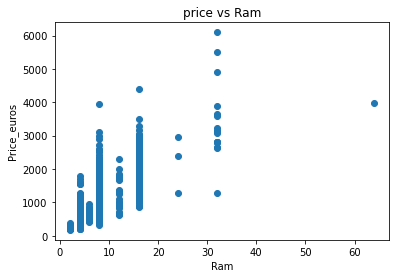

In [51]:
p_correlation = df['Ram'].corr(df['Price_euros'])
print('correlation ',p_correlation)
print('\n')
plt.scatter(x=df['Ram'],y=df['Price_euros']);
plt.xlabel('Ram')
plt.ylabel('Price_euros') 
plt.title('price vs Ram');

correlation  0.2118834449220652




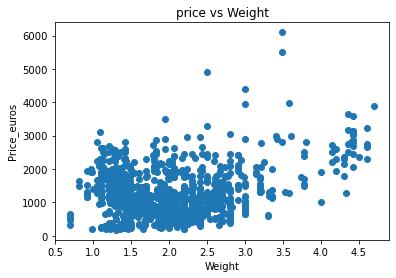

In [52]:
p_correlation = df['Weight'].corr(df['Price_euros'])
print('correlation ',p_correlation)
print('\n')
plt.scatter(x=df['Weight'],y=df['Price_euros']);
plt.xlabel('Weight')
plt.ylabel('Price_euros') 
plt.title('price vs Weight');

# X,Y separate

In [53]:
X = df.drop('Price_euros',axis=1)

In [54]:
Y = df[['Price_euros']]

In [55]:
X.shape,Y.shape

((1275, 15), (1275, 1))

# Encoding

In [56]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le = LabelEncoder()

In [58]:
from pandas.core.dtypes.common import is_numeric_dtype

In [59]:
for column in X.columns:
    if is_numeric_dtype(X[column]):
        continue
    X[column] = le.fit_transform(X[column])

In [60]:
X.head()

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Screen_Resoluton_Height,Screen_Display,Screen_Resoluton_Width,Cpu_Core,Cpu_Processor_Speed_GHz,Memory(storage_device),Memory(storage_amount)_GB
0,1,300,4,13.3,8,56,8,1.37,1600,12,2560,51,2.3,5,128.0
1,1,301,4,13.3,8,50,8,1.34,900,0,1440,51,1.8,0,128.0
2,7,50,3,15.6,8,52,4,1.86,1080,3,1920,57,2.5,5,256.0
3,1,300,4,15.4,16,8,8,1.83,1800,12,2880,65,2.7,5,512.0
4,1,300,4,13.3,8,57,8,1.37,1600,12,2560,51,3.1,5,256.0


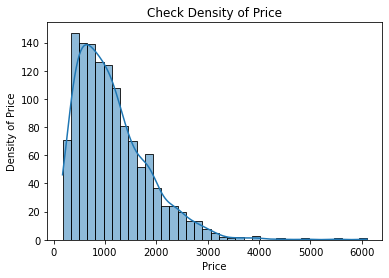

In [61]:
ax=sns.histplot(df['Price_euros'],kde=True)
ax.set_xlabel("Price")
ax.set_ylabel("Density of Price")
ax.set_title("Check Density of Price")
plt.show()

<AxesSubplot:>

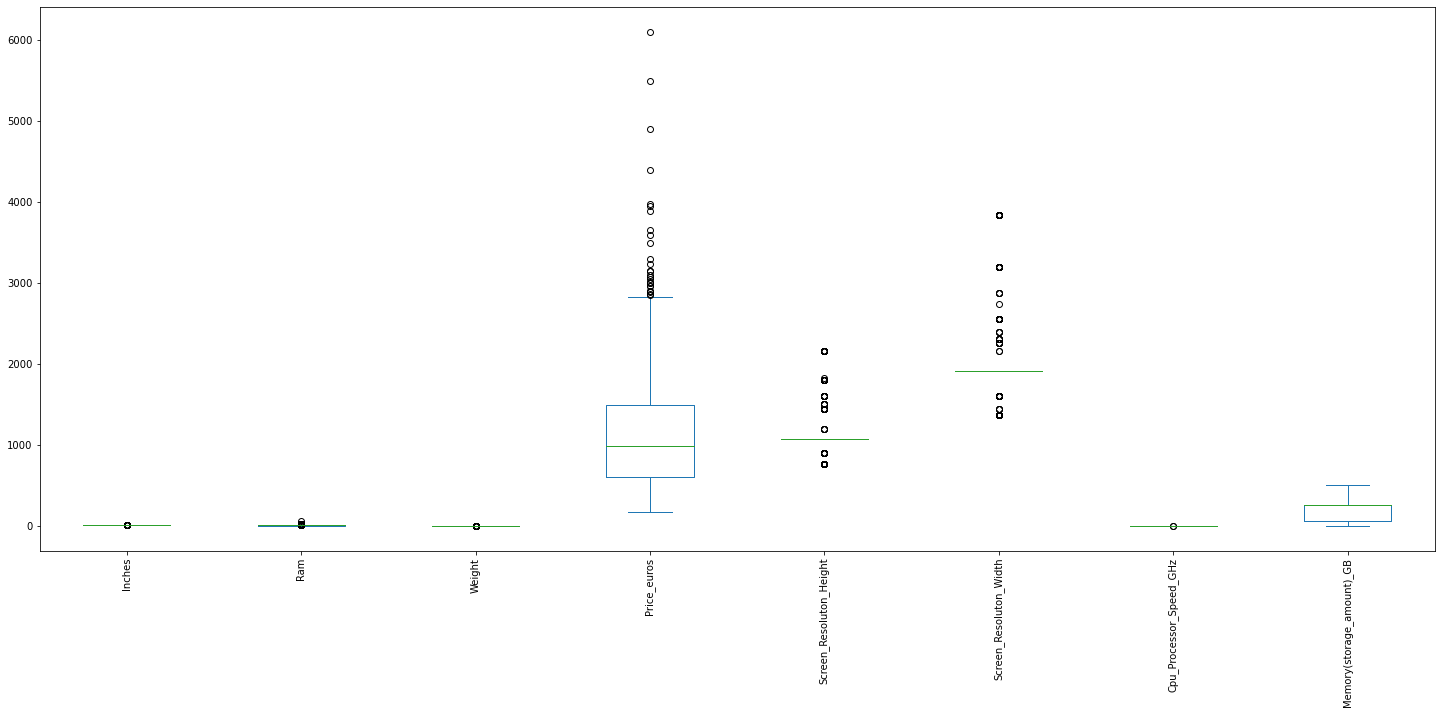

In [62]:
df.plot.box(figsize=(25,10), rot=90)

# Freature Engineering
## Normalization

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
minmax = MinMaxScaler(feature_range=(0,1)) # feature_range=(0, 1)

In [65]:
len(X.columns), len(Y.columns)

(15, 1)

In [66]:
for column in X.columns:
    
    X[column] = minmax.fit_transform(X[[column]])

In [67]:
X.head()

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Screen_Resoluton_Height,Screen_Display,Screen_Resoluton_Width,Cpu_Core,Cpu_Processor_Speed_GHz,Memory(storage_device),Memory(storage_amount)_GB
0,0.055556,0.486224,0.8,0.385542,0.096774,0.533333,1.0,0.169576,0.597701,0.60,0.482619,0.554348,0.518519,0.454545,0.248532
1,0.055556,0.487844,0.8,0.385542,0.096774,0.476190,1.0,0.162095,0.094828,0.00,0.029911,0.554348,0.333333,0.000000,0.248532
2,0.388889,0.081037,0.6,0.662651,0.096774,0.495238,0.5,0.291771,0.224138,0.15,0.223929,0.619565,0.592593,0.454545,0.499022
3,0.055556,0.486224,0.8,0.638554,0.225806,0.076190,1.0,0.284289,0.741379,0.60,0.611964,0.706522,0.666667,0.454545,1.000000
4,0.055556,0.486224,0.8,0.385542,0.096774,0.542857,1.0,0.169576,0.597701,0.60,0.482619,0.554348,0.814815,0.454545,0.499022


In [68]:
Y.head()

,Price_euros
0,1339.69
1,898.94
2,575.00
3,2537.45
4,1803.60


In [69]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company                    1275 non-null   float64
 1   Product                    1275 non-null   float64
 2   TypeName                   1275 non-null   float64
 3   Inches                     1275 non-null   float64
 4   Ram                        1275 non-null   float64
 5   Gpu                        1275 non-null   float64
 6   OpSys                      1275 non-null   float64
 7   Weight                     1275 non-null   float64
 8   Screen_Resoluton_Height    1275 non-null   float64
 9   Screen_Display             1275 non-null   float64
 10  Screen_Resoluton_Width     1275 non-null   float64
 11  Cpu_Core                   1275 non-null   float64
 12  Cpu_Processor_Speed_GHz    1275 non-null   float64
 13  Memory(storage_device)     1275 non-null   float

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1274
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Company                    1275 non-null   object 
 1   Product                    1275 non-null   object 
 2   TypeName                   1275 non-null   object 
 3   Inches                     1275 non-null   float64
 4   Ram                        1275 non-null   int32  
 5   Gpu                        1275 non-null   object 
 6   OpSys                      1275 non-null   object 
 7   Weight                     1275 non-null   float64
 8   Price_euros                1275 non-null   float64
 9   Screen_Resoluton_Height    1275 non-null   int64  
 10  Screen_Display             1275 non-null   object 
 11  Screen_Resoluton_Width     1275 non-null   int64  
 12  Cpu_Core                   1275 non-null   object 
 13  Cpu_Processor_Speed_GHz    1275 non-null   float

# correlation

In [71]:
X.corr()

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Screen_Resoluton_Height,Screen_Display,Screen_Resoluton_Width,Cpu_Core,Cpu_Processor_Speed_GHz,Memory(storage_device),Memory(storage_amount)_GB
Company,1.000000,0.069802,0.001678,-0.082380,0.041771,0.026729,0.127853,-0.128194,0.043498,0.083922,0.046347,0.023631,0.133191,0.101731,0.107550
Product,0.069802,1.000000,0.076330,-0.213195,0.018830,0.103259,0.114857,-0.244554,0.158163,0.199818,0.157595,0.154984,-0.043060,0.053956,0.116374
TypeName,0.001678,0.076330,1.000000,-0.086162,-0.242265,-0.200297,0.090069,-0.275440,-0.059244,-0.211522,-0.074363,-0.119149,-0.082810,-0.195650,0.061059
Inches,-0.082380,-0.213195,-0.086162,1.000000,0.241078,0.199605,0.039672,0.826638,-0.093062,-0.282932,-0.068223,0.142788,0.305037,0.183145,-0.100987
Ram,0.041771,0.018830,-0.242265,0.241078,1.000000,0.384494,0.140002,0.389370,0.415241,0.219431,0.424089,0.445475,0.366254,0.472031,0.187187
Gpu,0.026729,0.103259,-0.200297,0.199605,0.384494,1.000000,0.099399,0.319862,0.218842,0.159244,0.229344,0.488379,0.289930,0.280566,0.043228
OpSys,0.127853,0.114857,0.090069,0.039672,0.140002,0.099399,1.000000,0.011309,0.149078,0.069145,0.148355,0.108014,0.219762,0.259775,0.192880
Weight,-0.128194,-0.244554,-0.275440,0.826638,0.389370,0.319862,0.011309,1.000000,-0.050106,-0.155452,-0.028605,0.179937,0.318649,0.225176,-0.105474
Screen_Resoluton_Height,0.043498,0.158163,-0.059244,-0.093062,0.415241,0.218842,0.149078,-0.050106,1.000000,0.478766,0.994069,0.300759,0.164369,0.335553,0.155782
Screen_Display,0.083922,0.199818,-0.211522,-0.282932,0.219431,0.159244,0.069145,-0.155452,0.478766,1.000000,0.451459,0.205034,0.031605,0.203254,0.074855


<AxesSubplot:>

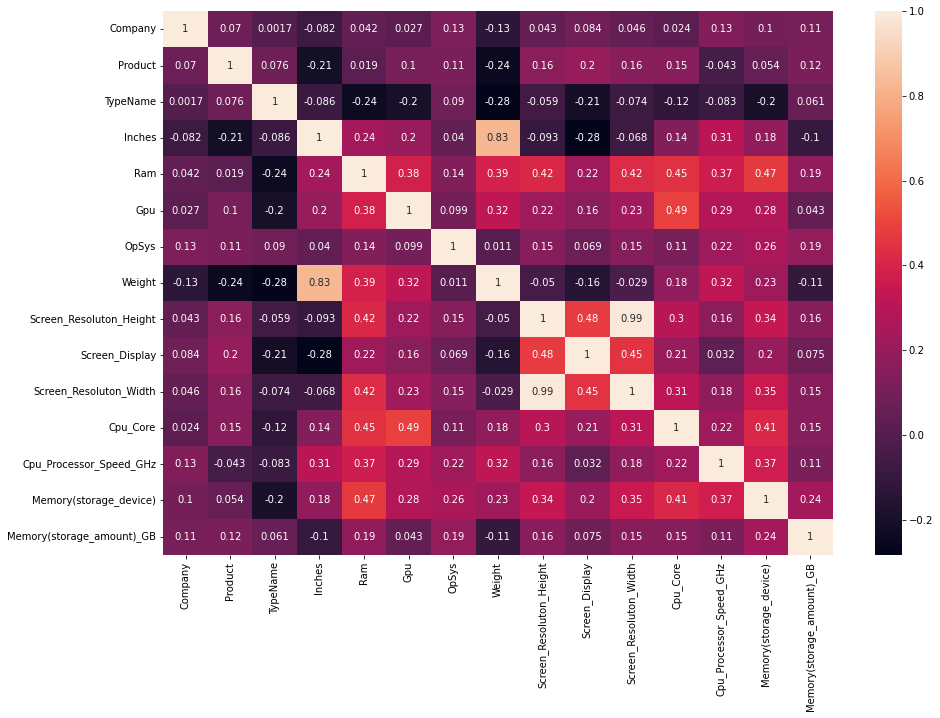

In [72]:
plt.subplots(figsize=(15,10)) 
sns.heatmap(X.corr() , annot=True)

# checking unique values

In [73]:
df.head()

,Company,Product,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Screen_Resoluton_Height,Screen_Display,Screen_Resoluton_Width,Cpu_Core,Cpu_Processor_Speed_GHz,Memory(storage_device),Memory(storage_amount)_GB
0,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,1600,IPS Panel Retina Display,2560,Intel Core i5,2.3,SSD,128.0
1,Apple,Macbook Air,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,900,,1440,Intel Core i5,1.8,Flash Storage,128.0
2,HP,250 G6,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,1080,Full HD,1920,Intel Core i5 7200U,2.5,SSD,256.0
3,Apple,MacBook Pro,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,1800,IPS Panel Retina Display,2880,Intel Core i7,2.7,SSD,512.0
4,Apple,MacBook Pro,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,1600,IPS Panel Retina Display,2560,Intel Core i5,3.1,SSD,256.0


In [74]:
for column in df.columns:
    n=df[column].nunique()
    print('unique values for ', column ,' is ', n)

unique values for  Company  is  19
unique values for  Product  is  618
unique values for  TypeName  is  6
unique values for  Inches  is  18
unique values for  Ram  is  9
unique values for  Gpu  is  106
unique values for  OpSys  is  9
unique values for  Weight  is  171
unique values for  Price_euros  is  791
unique values for  Screen_Resoluton_Height  is  10
unique values for  Screen_Display  is  21
unique values for  Screen_Resoluton_Width  is  13
unique values for  Cpu_Core  is  93
unique values for  Cpu_Processor_Speed_GHz  is  25
unique values for  Memory(storage_device)  is  12
unique values for  Memory(storage_amount)_GB  is  13


# visualization

Text(0.5, 1.0, 'Distribution of Weight')

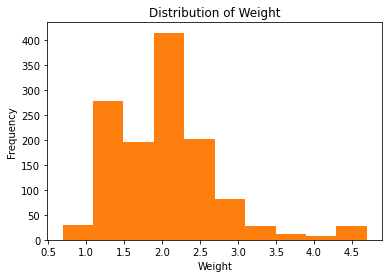

In [75]:
#creating a histogram
import matplotlib.pyplot as plt
plt.hist(df['Weight'])
plt.hist(df['Weight']);
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Distribution of Weight")

Text(0.5, 1.0, 'Distribution of Company')

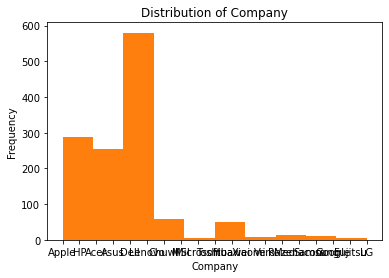

In [76]:
#creating a histogram
import matplotlib.pyplot as plt
plt.hist(df['Company'])
plt.hist(df['Company']);
plt.xlabel("Company")
plt.ylabel("Frequency")
plt.title("Distribution of Company")

Text(0.5, 1.0, 'Distribution of Cpu_Core')

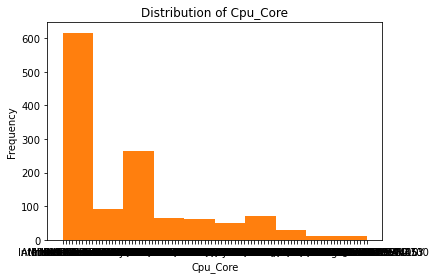

In [77]:
#creating a histogram
import matplotlib.pyplot as plt
plt.hist(df['Cpu_Core'])
plt.hist(df['Cpu_Core']);
plt.xlabel("Cpu_Core")
plt.ylabel("Frequency")
plt.title("Distribution of Cpu_Core")

Text(0.5, 1.0, 'Distribution of Ram')

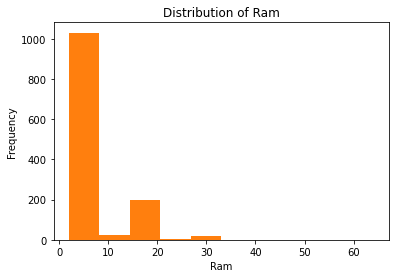

In [78]:
#creating a histogram
import matplotlib.pyplot as plt
plt.hist(df['Ram'])
plt.hist(df['Ram']);
plt.xlabel("Ram")
plt.ylabel("Frequency")
plt.title("Distribution of Ram")

Text(0.5, 1.0, 'Distribution of Memory(storage_amount)_GB')

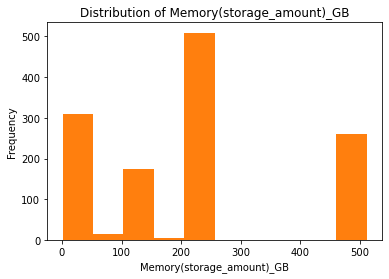

In [79]:
#creating a histogram
import matplotlib.pyplot as plt
plt.hist(df['Memory(storage_amount)_GB'])
plt.hist(df['Memory(storage_amount)_GB']);
plt.xlabel("Memory(storage_amount)_GB")
plt.ylabel("Frequency")
plt.title("Distribution of Memory(storage_amount)_GB")

Text(0.5, 1.0, 'Distribution of Screen_Resoluton_Width')

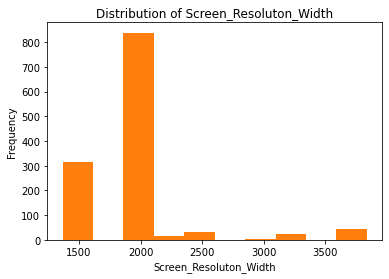

In [80]:
#creating a histogram
import matplotlib.pyplot as plt
plt.hist(df['Screen_Resoluton_Width'])
plt.hist(df['Screen_Resoluton_Width']);
plt.xlabel("Screen_Resoluton_Width")
plt.ylabel("Frequency")
plt.title("Distribution of Screen_Resoluton_Width")

Text(0.5, 1.0, 'Distribution of Screen_Resoluton_Height')

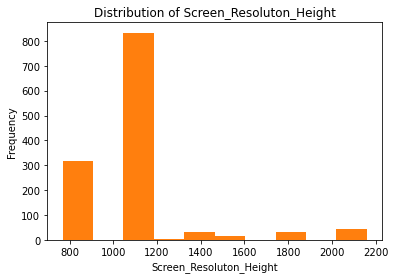

In [ ]:

#creating a histogram
import matplotlib.pyplot as plt
plt.hist(df['Screen_Resoluton_Height'])
plt.hist(df['Screen_Resoluton_Height']);
plt.xlabel("Screen_Resoluton_Height")
plt.ylabel("Frequency")
plt.title("Distribution of Screen_Resoluton_Height")

In [ ]:
#creating a histogram
import matplotlib.pyplot as plt
plt.hist(df['Gpu'])
plt.hist(df['Gpu']);
plt.xlabel("Gpu")
plt.ylabel("Frequency")
plt.title("Distribution of Gpu")

# Cross Validation (Hold Out)

In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
xtrain,xtest,ytrain,ytest=tts(X,Y,train_size=.70,random_state=24)

In [ ]:
xtrain.head()

In [ ]:
ytrain.head()

# Linear Regression (Multiple Variable)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr= LinearRegression()

In [ ]:
lr.fit(xtrain,ytrain)

In [ ]:
lr.score(xtest,ytest) #with hold out cross validation

In [ ]:
lr.score(xtrain,ytrain) #with hold out cross validation

In [ ]:
score_linear_reg = lr.score(xtest,ytest)

In [ ]:
score_linear_reg 

# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
d_tree_reg=DecisionTreeRegressor()

In [ ]:
d_tree_reg.fit(xtrain,ytrain)

In [ ]:
d_tree_reg.score(xtrain,ytrain)

In [ ]:
d_tree_reg.score(xtest,ytest)

In [ ]:
score_DecisionTreeRegressor = d_tree_reg.score(xtest,ytest)
score_DecisionTreeRegressor

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random_fr_reg=RandomForestRegressor()

In [ ]:
random_fr_reg.fit(xtrain,ytrain)

In [ ]:
random_fr_reg.score(xtest,ytest)

In [ ]:
random_fr_reg.score(xtrain,ytrain)

# KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
KNN=KNeighborsRegressor()

In [ ]:
KNN.fit(xtrain,ytrain)

In [ ]:
KNN.score(xtest,ytest)

In [ ]:
KNN.score(xtrain,ytrain)

# SVR(Support Vector Regression)

In [ ]:
from sklearn.svm import SVR

In [ ]:
sv=SVR()

In [ ]:
sv.fit(xtrain,ytrain)

In [ ]:
sv.score(xtrain,ytrain)

In [ ]:
sv.score(xtest,ytest)

# Ada-Boost-Regressor

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
ada=AdaBoostRegressor()

In [ ]:
ada.fit(xtrain,ytrain)

In [ ]:
ada.score(xtrain,ytrain)

In [ ]:
ada.score(xtest,ytest)

# XG BOOST

In [ ]:

import xgboost as xg

In [ ]:
xgb = xg.XGBRegressor()

In [ ]:
xgb.fit(xtrain,ytrain)

In [ ]:
xgb.score(xtrain,ytrain)

In [ ]:
xgb.score(xtest,ytest)

# Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gBoost=GradientBoostingRegressor()

In [ ]:
gBoost.fit(xtrain,ytrain)

In [ ]:
gBoost.score(xtrain,ytrain)

In [ ]:
gBoost.score(xtest,ytest)

# Feature Selection Pearson Correlation

In [ ]:
cor = xtrain.corr()
cor

In [ ]:
def correlation(dataset, threshold):
    col_corr = set() #set of all the names of correlated columns
    corr_matrix = dataset.corr() #correlation matrix

    for i in range(len(corr_matrix.columns)): # matrix er each column i c
        for j in range (i): #each column er moddhe (row) column
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i] #getting the name of the column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features  =  correlation(xtrain,0.70)
corr_features

In [ ]:

xtrain.drop(corr_features, axis=1)

In [ ]:
xtest.drop(corr_features, axis=1)

# Linear Regression (Multiple Variable)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr= LinearRegression()

In [ ]:
lr.fit(xtrain,ytrain)

In [ ]:
lr.score(xtest,ytest) #with hold out cross validation

In [ ]:
lr.score(xtrain,ytrain) #with hold out cross validation

In [ ]:
score_linear_reg = lr.score(xtest,ytest)
score_linear_reg

# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
d_tree_reg=DecisionTreeRegressor()

In [ ]:
d_tree_reg.fit(xtrain,ytrain)

In [ ]:
d_tree_reg.score(xtrain,ytrain)

In [ ]:
d_tree_reg.score(xtest,ytest)

In [ ]:
score_DecisionTreeRegressor = d_tree_reg.score(xtest,ytest)
score_DecisionTreeRegressor

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random_fr_reg=RandomForestRegressor()

In [ ]:
random_fr_reg.fit(xtrain,ytrain)

In [ ]:
random_fr_reg.score(xtest,ytest)

In [ ]:
random_fr_reg.score(xtrain,ytrain)

# KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
KNN=KNeighborsRegressor()

In [ ]:
KNN.fit(xtrain,ytrain)

In [ ]:
KNN.score(xtest,ytest)

In [ ]:
KNN.score(xtrain,ytrain)

# Another Feature Selection SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest

In [ ]:
from sklearn.feature_selection import f_classif

In [ ]:
FIT_FEATURES = SelectKBest(score_func = f_classif)

In [ ]:
FIT_FEATURES.fit(X,Y)

In [ ]:
score = pd.DataFrame(FIT_FEATURES.scores_, columns=['score_value'])

In [ ]:
score

In [ ]:
name_col = pd.DataFrame(X.columns)

In [ ]:
topr_features = pd.concat([name_col,score], axis=1)
topr_features

In [ ]:
topr_features = topr_features.nlargest(11,'score_value')
topr_features

In [ ]:
X.drop('Company',axis=1,inplace=True)

In [ ]:
X.head()

In [ ]:

X.drop('Product',axis=1,inplace=True)

In [ ]:
X.drop('TypeName',axis=1,inplace=True)

In [ ]:
X.drop('Inches',axis=1,inplace=True)

In [ ]:
X.head()

In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
xtrain,xtest,ytrain,ytest=tts(X,Y,train_size=.70,random_state=24)

In [ ]:
xtrain.head()

# Linear Regression (Multiple Variable)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr= LinearRegression()

In [ ]:
lr.fit(xtrain,ytrain)

In [ ]:
lr.score(xtest,ytest) #with hold out cross validation

In [ ]:
lr.score(xtrain,ytrain) #with hold out cross validation

In [ ]:
score_linear_reg = lr.score(xtest,ytest)
score_linear_reg 

# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
d_tree_reg=DecisionTreeRegressor()

In [ ]:
d_tree_reg.fit(xtrain,ytrain)

In [ ]:
d_tree_reg.score(xtrain,ytrain)

In [ ]:
d_tree_reg.score(xtest,ytest)

In [ ]:
score_DecisionTreeRegressor = d_tree_reg.score(xtest,ytest)
score_DecisionTreeRegressor

# Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
random_fr_reg=RandomForestRegressor()

In [ ]:
random_fr_reg.fit(xtrain,ytrain)

In [ ]:
random_fr_reg.score(xtest,ytest)

In [ ]:
random_fr_reg.score(xtrain,ytrain)

# KNN Regressor

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
KNN=KNeighborsRegressor()

In [ ]:
KNN.fit(xtrain,ytrain)

In [ ]:
KNN.score(xtest,ytest)

In [ ]:
KNN.score(xtrain,ytrain)

# Analaysis

# Accuracy

### Before Feature Selection

Linear Regression 72%

Decision Tree Regressor 72%

Random Forest Regressor 82%

KNN Regressor 75%

SVM 3%

Ada-Boost-Regressor 69%

XG Boost 85%

Gradient Boost 84%

### After Pearson Correlation Feature Selection

Linear Regression 71%

Decision Tree Regressor 69%

Random Forest Regressor 79%

KNN Regressor 74%

### After Select K Best Feature Selection

Linear Regression 71%

Decision Tree Regressor 67%

Random Forest Regressor 80%

KNN Regressor 74%